# Plan dnia

1. Wprowadzenie do sieci neuronowych
2. Perceptron wielowarstwowy- klasyfikacja danych tabelarycznych
3. Sieci konwolucyjne - klasyfikacja obrazów

# Metoda spadku gradientu (gradient descent)

Mamy problem optymalizacyjny: szukamy parametru $\theta$, dla którego funkcja $f(\theta)$ przyjmuje wartość najmniejszą.

Algorytm:

Iteracyjnie poprawiamy wartość parametru według wzoru:

$$\theta_{new} = \theta_{old} - learning\_rate * \frac{df}{d\theta}$$

Dlaczego tak?
- gdy funkcja dla danego $\theta$ jest rosnąca, to pochodna jest dodatnia, więc przesumamy się w lewo,
- gdy funkcja dla danego $\theta$ jest malejąca, to pochodna jest ujemna, więc przesumamy się w prawo.

W skrócie: sprawdzamy w którą stronę funkcja maleje i tam się przesuwamy - tym dalej im nachylenie większe.

W przypadku wielowymiarowym - funkcja wielu zmiennych / $\theta$ jest wektorem - zamiast pochodnej mamy gradient: $\frac{df}{d\theta} = grad(f) = (\frac{df}{d\theta_1}, ..., \frac{df}{d\theta_k})$.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import time

def f(x):
    return(x**2 - 6*x + 12)
    
def grad_f(x):
    return(2*x - 6)


from IPython import display


def visualise_gradient_decsent(f=f,grad_f=grad_f,theta = -2, learning_rate=0.8, sec=3, x = np.linspace(-5,11,100)):

    """
    Funkcja wizualizujaca optymalizacje metoda spadku gradient.
    
    f - definicja funkcji, ktora chcemy zoptymalizowac
    grad_f - definicja jej pochodnej
    theta - punkt startowy
    learning_rate - wspolczynnik uczenia
    sec - dlugosc przerwy pomiedzy wyswietlaniem kolejnych elementow w sekundach
    x - przedzial na ktorym wizualizujemy dzialanie metody
    
    """
    
    y = f(x)
    
    for i in range(100):

        plt.figure(figsize=(10,10))
        plt.plot(x,y,c="blue")
        plt.scatter(theta,0,s=60)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.vlines(x=theta,ymin=0,ymax=f(theta))


        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        theta_new = theta - learning_rate*grad_f(theta)


        plt.arrow(theta, f(theta), 2, 2*grad_f(theta), head_width = 0.3,head_length = 0.3 )

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)


        plt.text(-1,40,"grad = %.3f" % grad_f(theta), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(-2,30,"step = -1 *  %.2f * %.2f = " % (learning_rate,grad_f(theta)), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(-2,30,"step = -1 *  %.2f * %.2f = %.2f" % (learning_rate,grad_f(theta), -learning_rate*grad_f(theta)), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)



        delta = theta_new - theta

        plt.text(min(theta,theta_new),3,"step = %.3f" % ( -learning_rate*grad_f(theta)), fontsize=20)
        plt.arrow(theta, 0, 0.9*delta, 0, head_width = 1,head_length = np.abs(0.1*delta),color="red" )

        display.clear_output(wait=True)
        display.display(plt.gcf())

        #plt.annotate('', xy=(theta, 10), xytext=(theta_new, 10),
        #                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
        #                   va='center', ha='center')
        theta = theta_new

        plt.vlines(x=theta,ymin=0,ymax=f(theta))
        #plt.show()

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

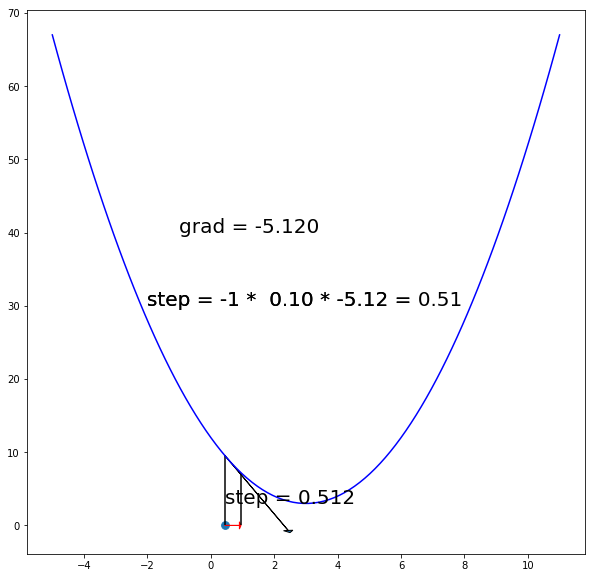

KeyboardInterrupt: 

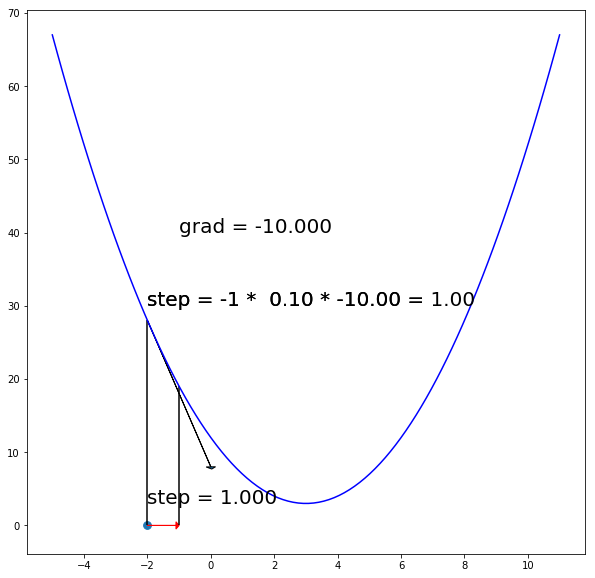

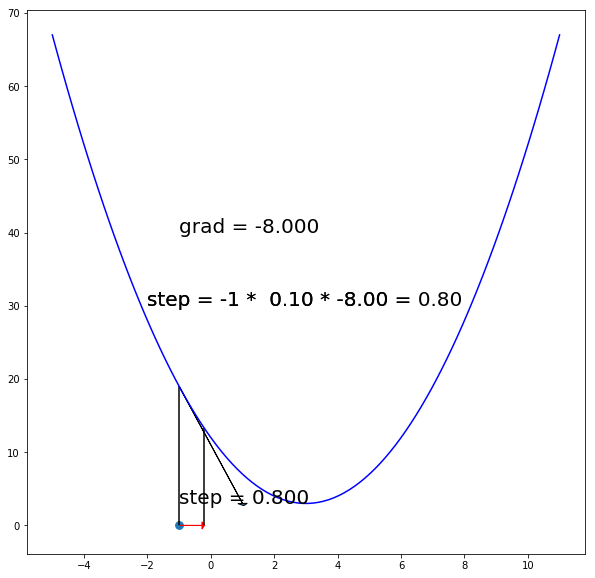

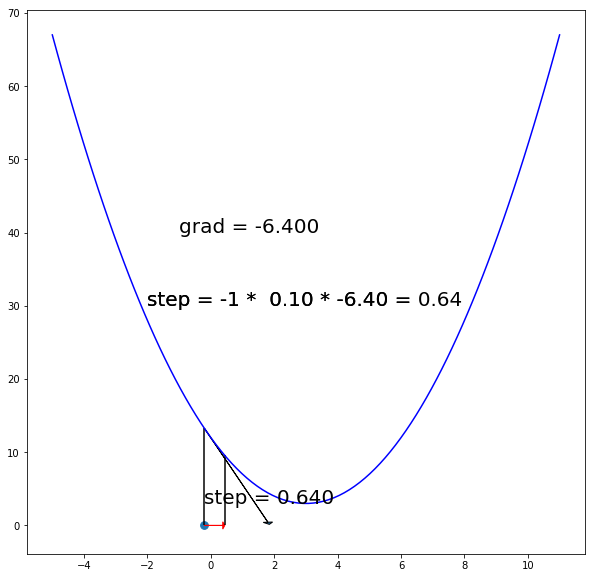

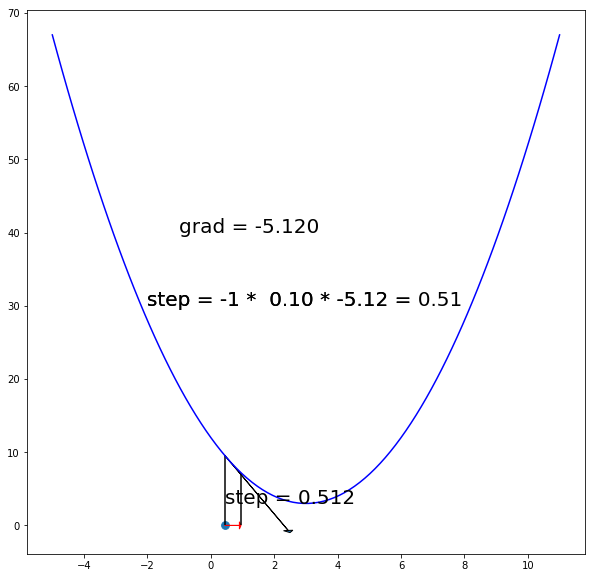

In [2]:
visualise_gradient_decsent(learning_rate=0.1,sec=2) #dla lr=1 zapetla sie

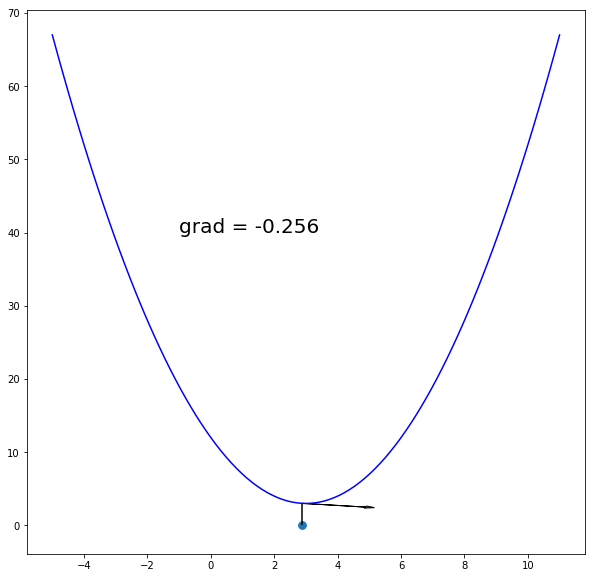

KeyboardInterrupt: 

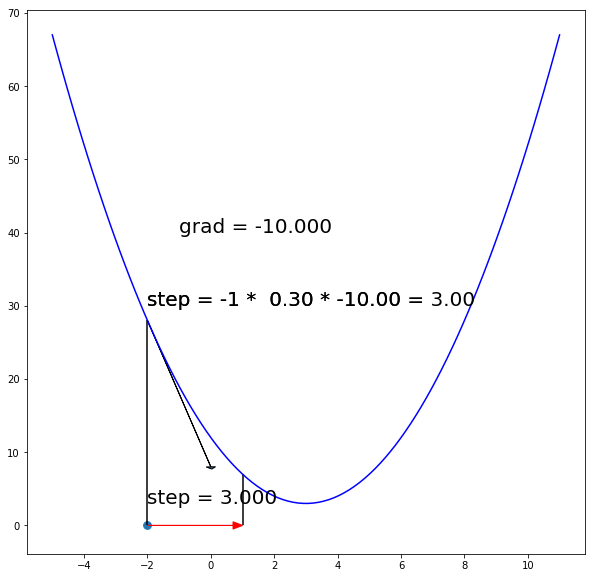

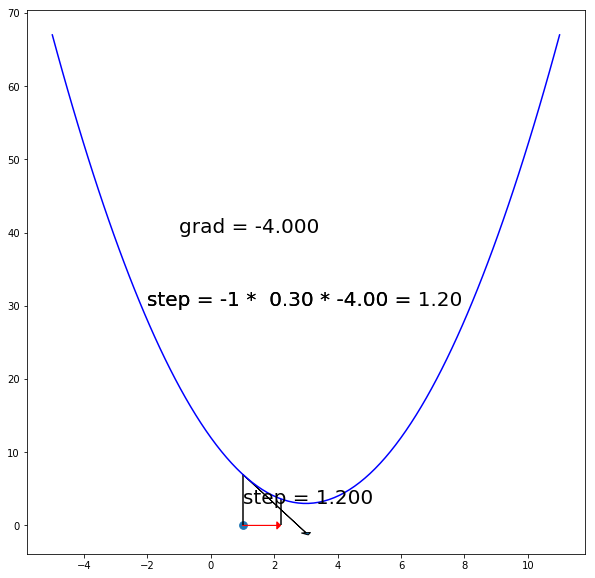

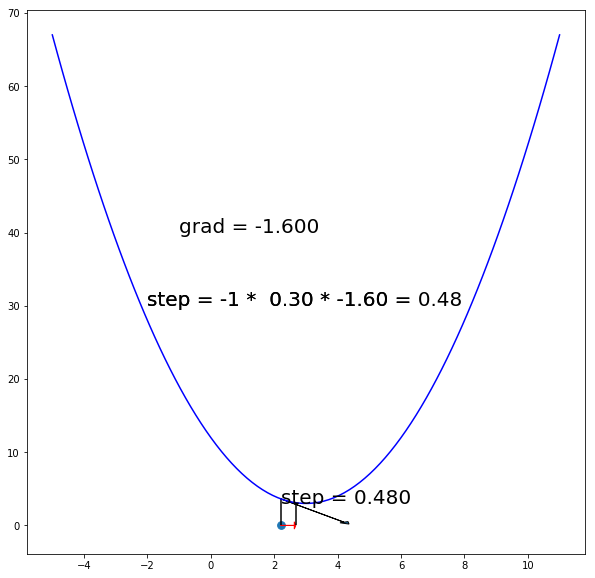

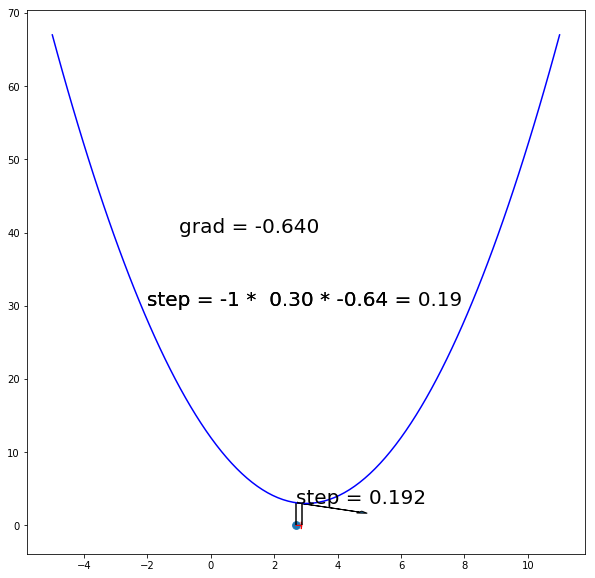

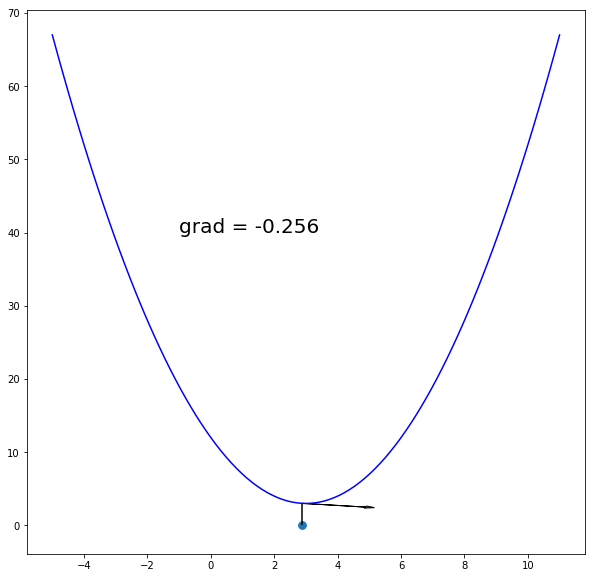

In [3]:
visualise_gradient_decsent(learning_rate=0.3, sec=1)

KeyboardInterrupt: 

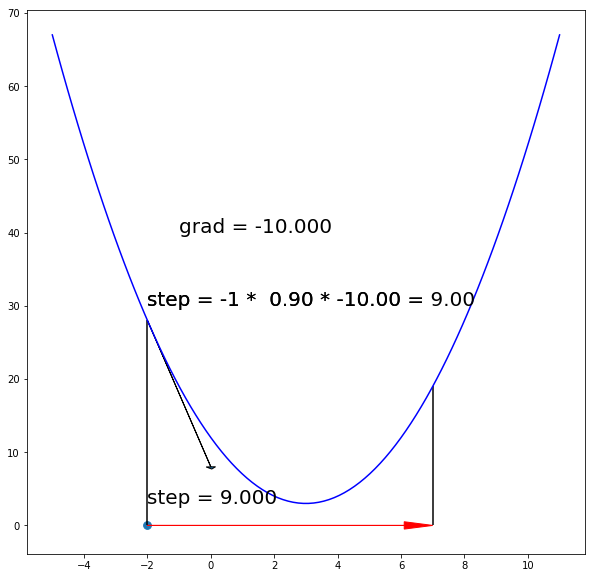

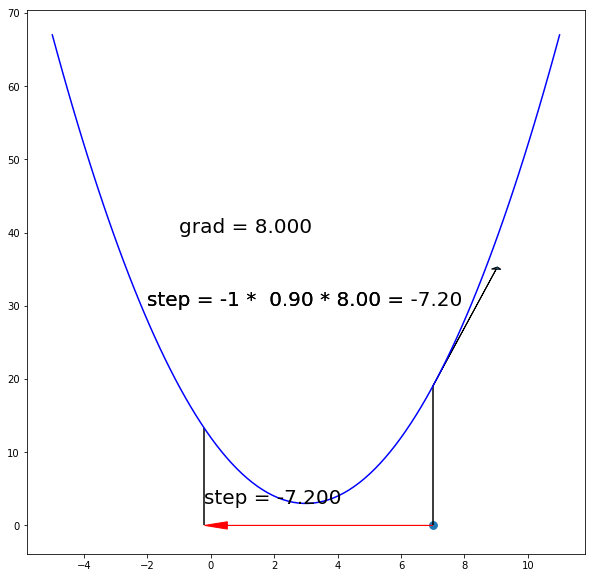

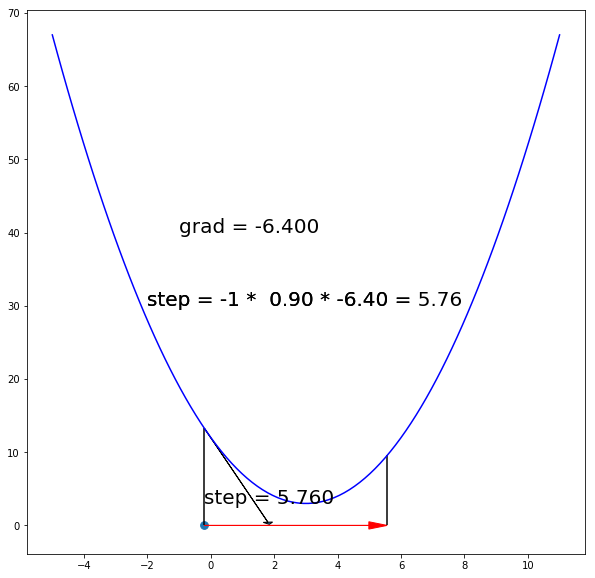

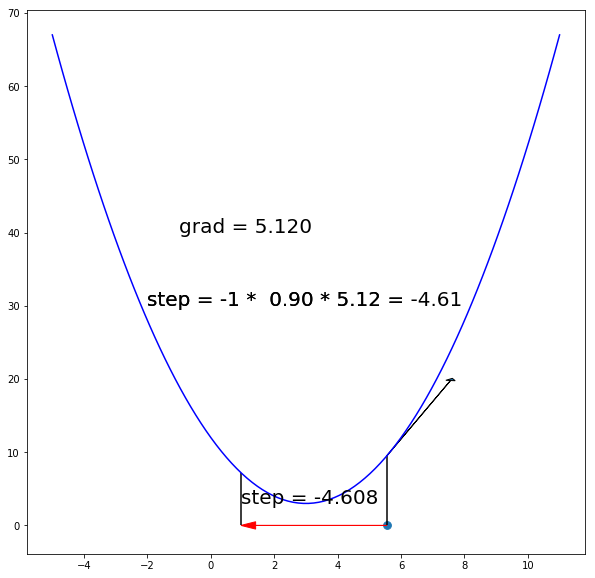

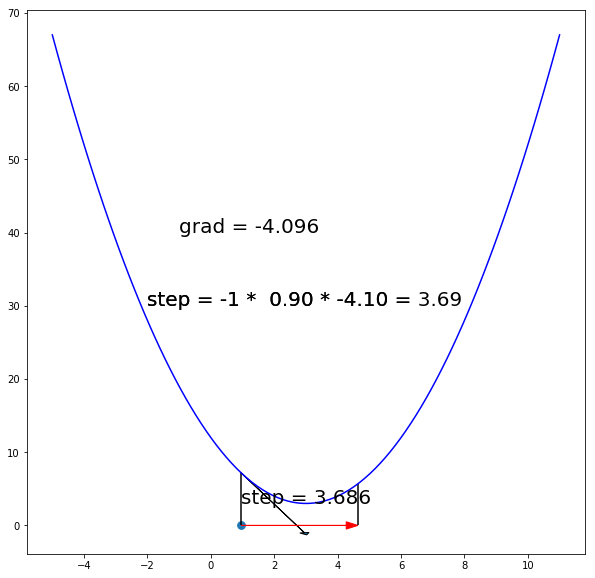

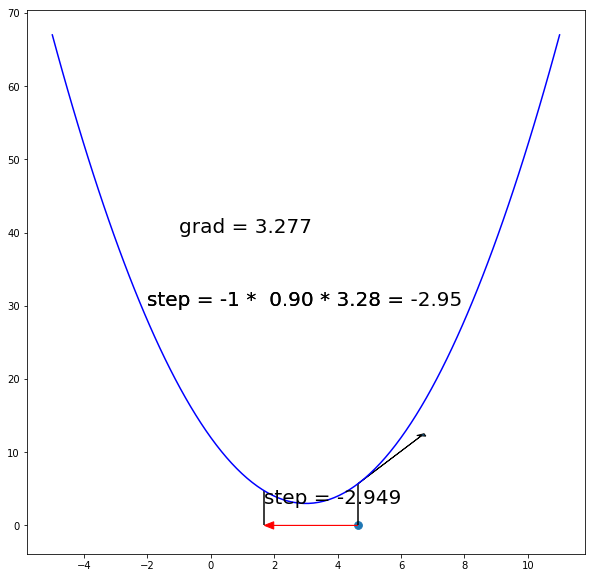

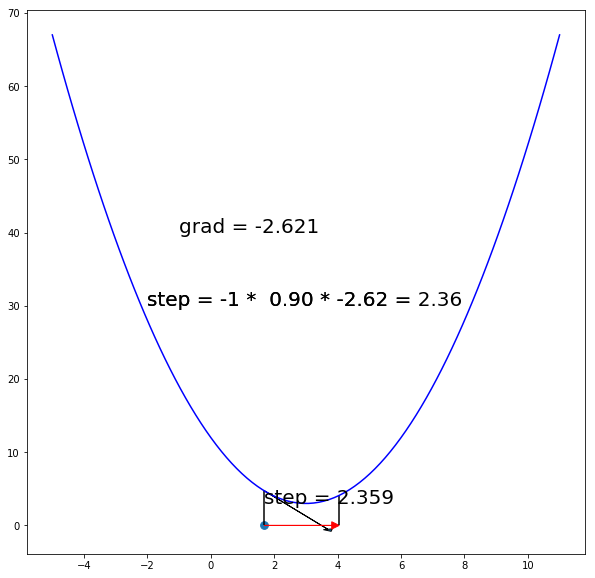

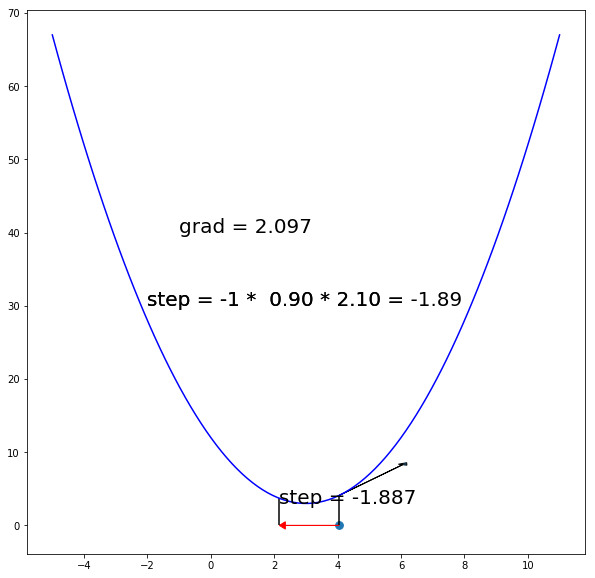

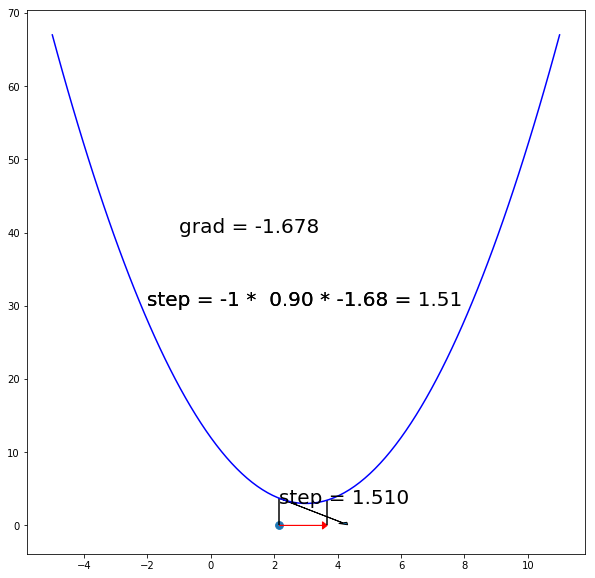

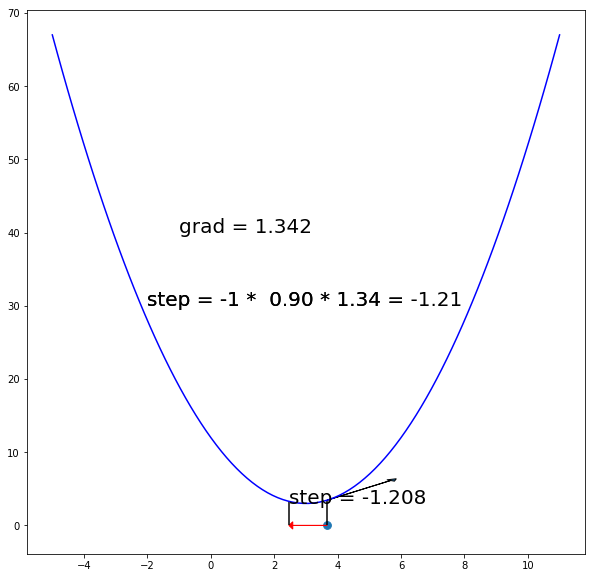

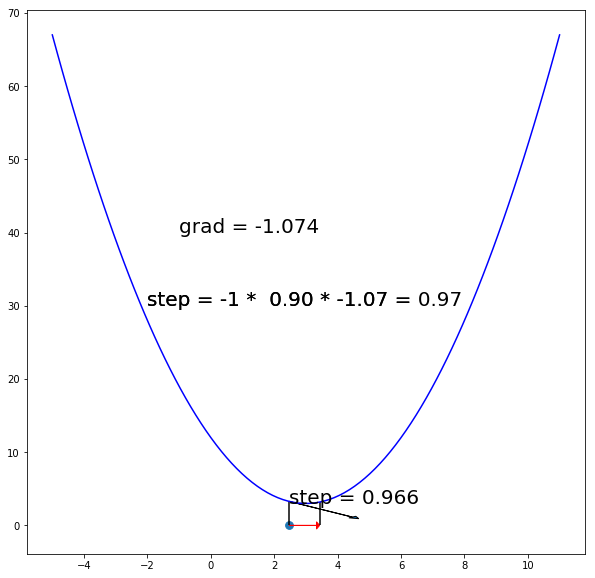

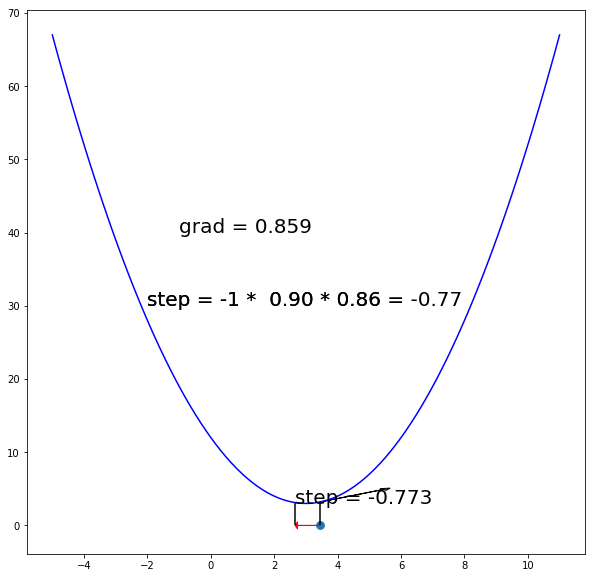

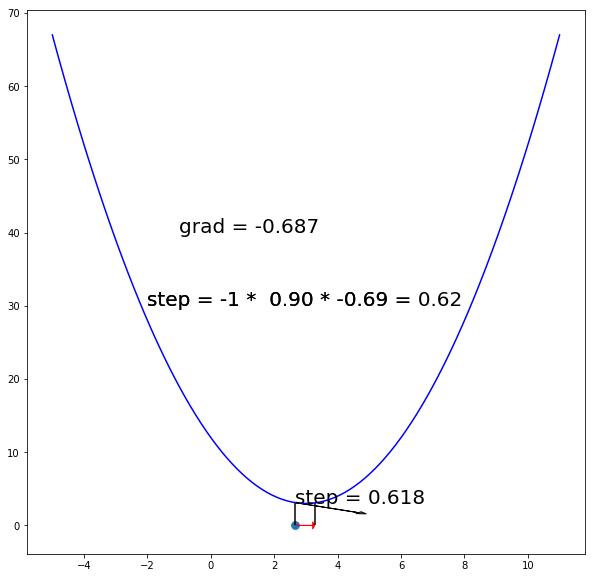

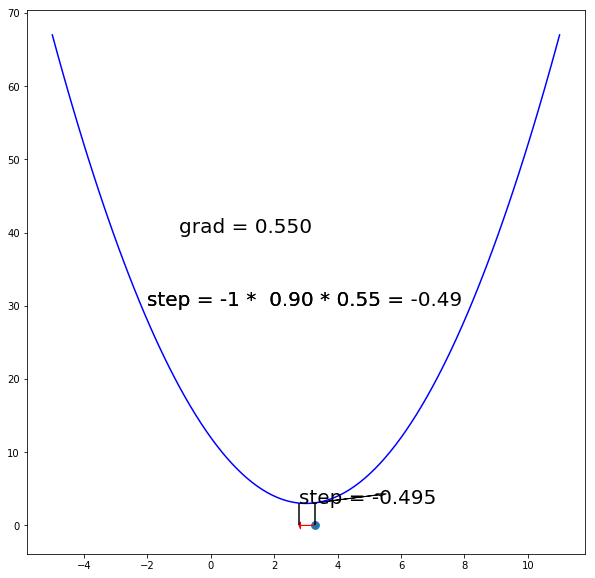

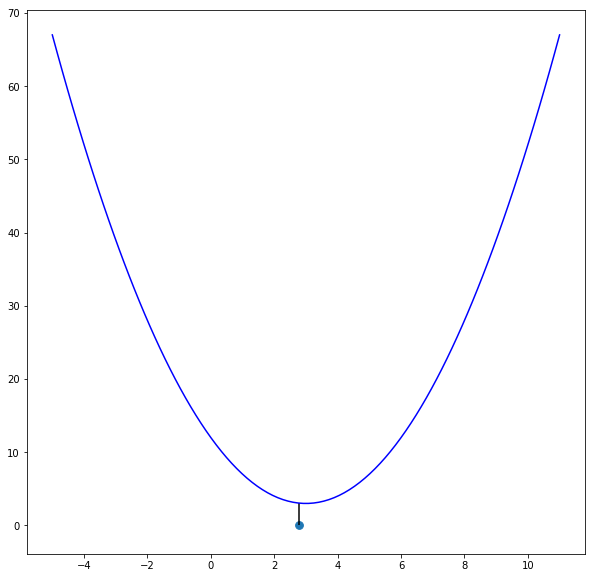

In [4]:
visualise_gradient_decsent(learning_rate=0.9,sec=0.25)

KeyboardInterrupt: 

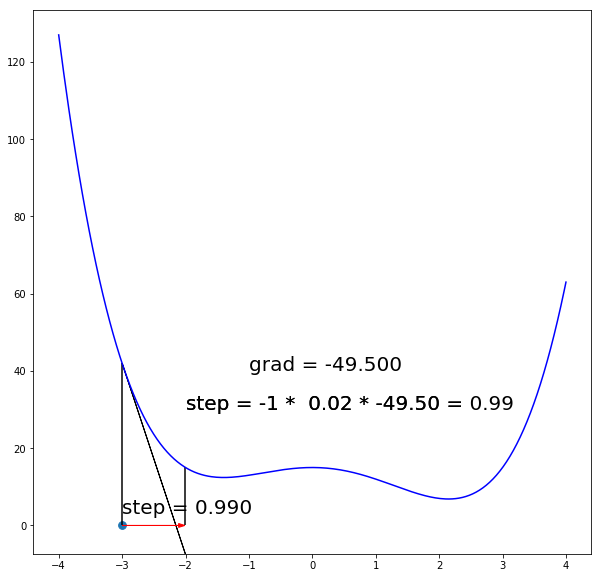

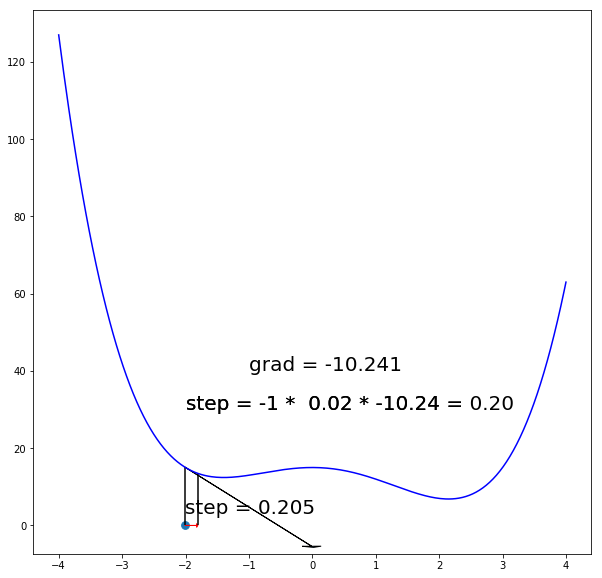

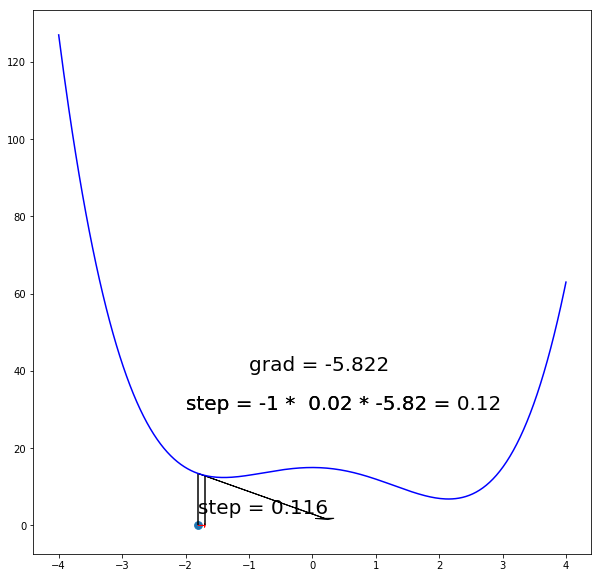

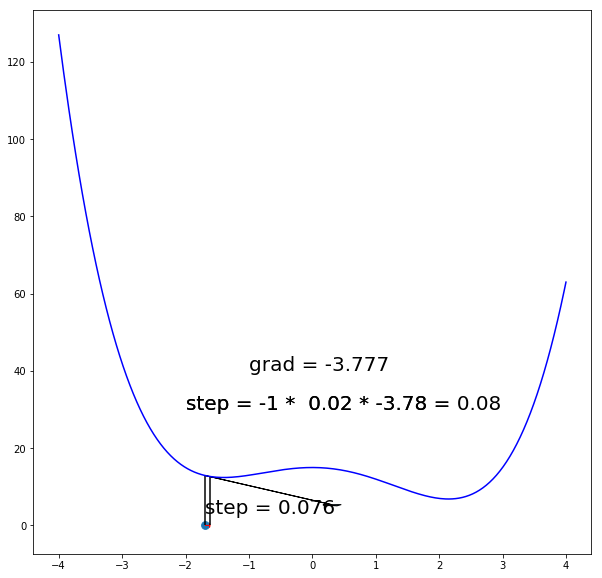

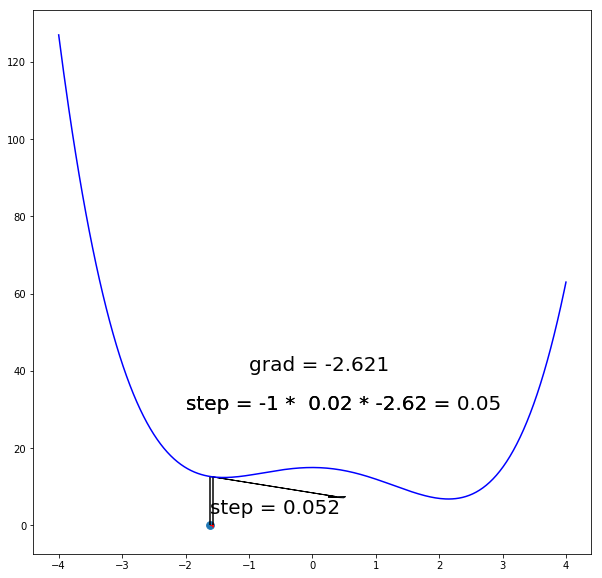

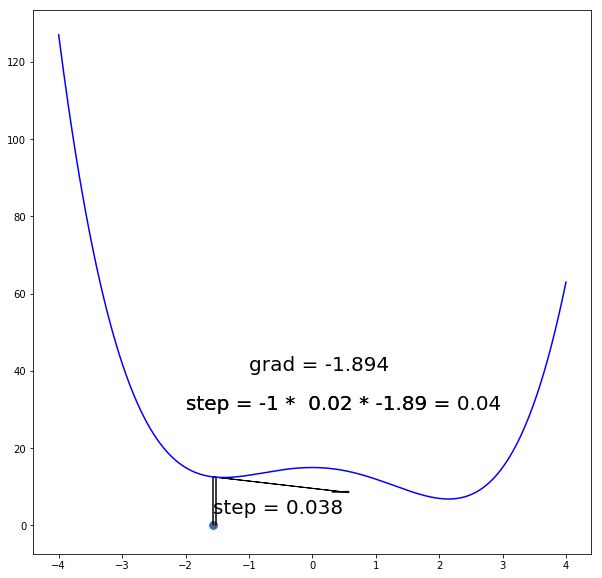

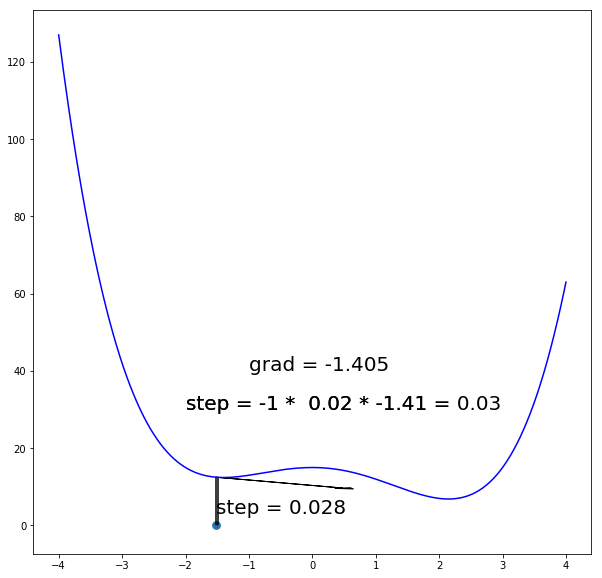

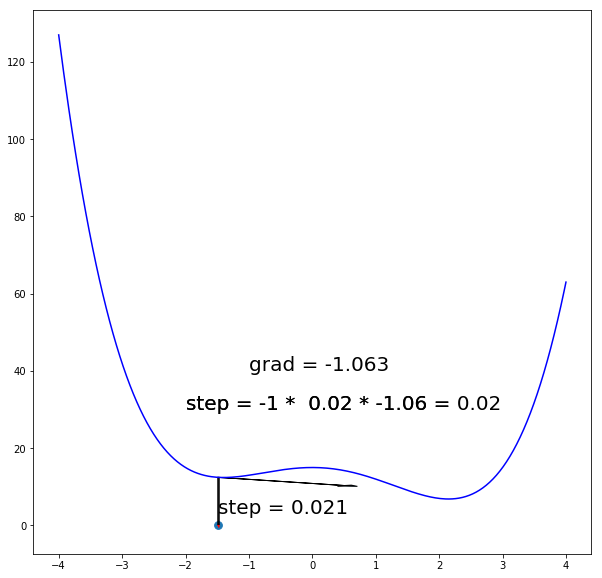

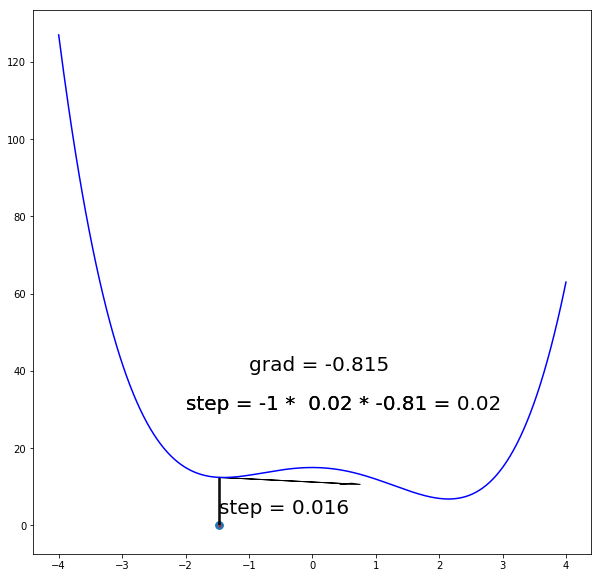

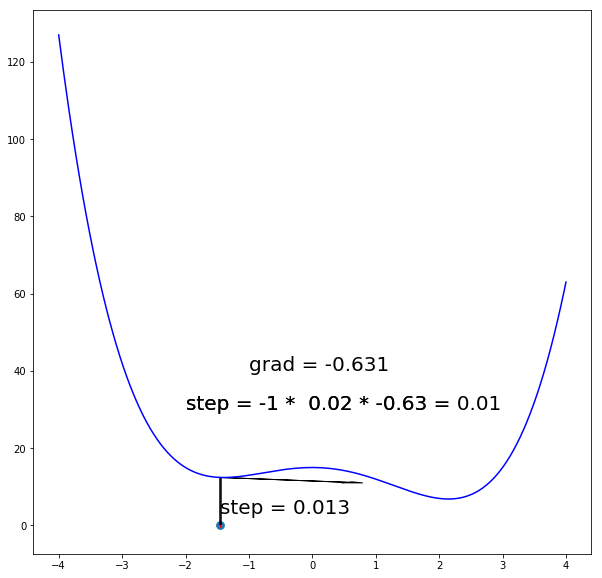

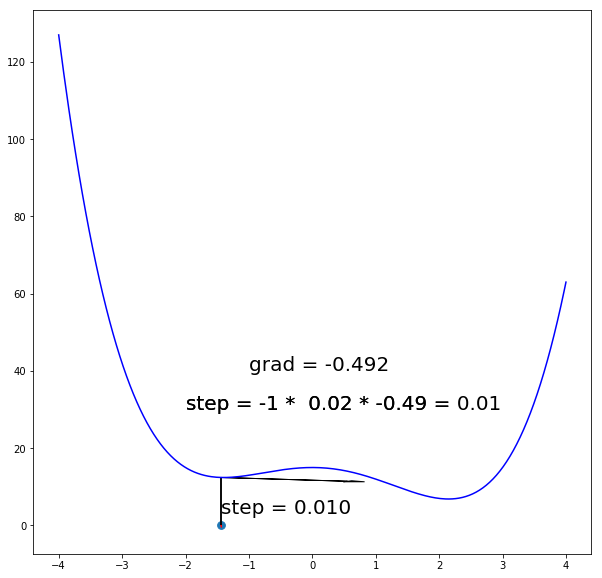

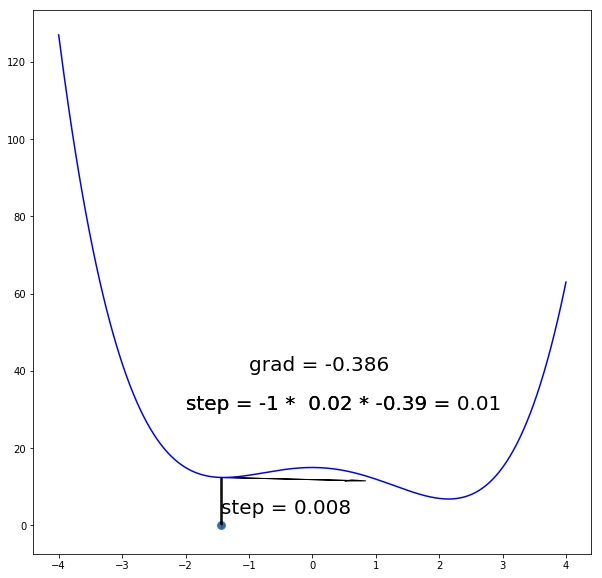

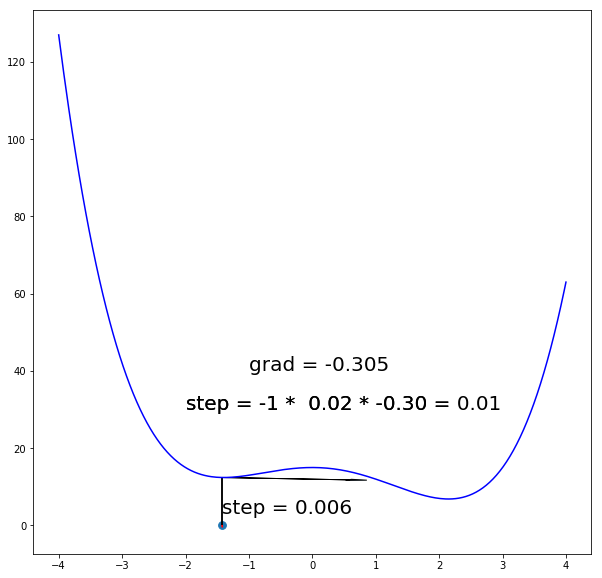

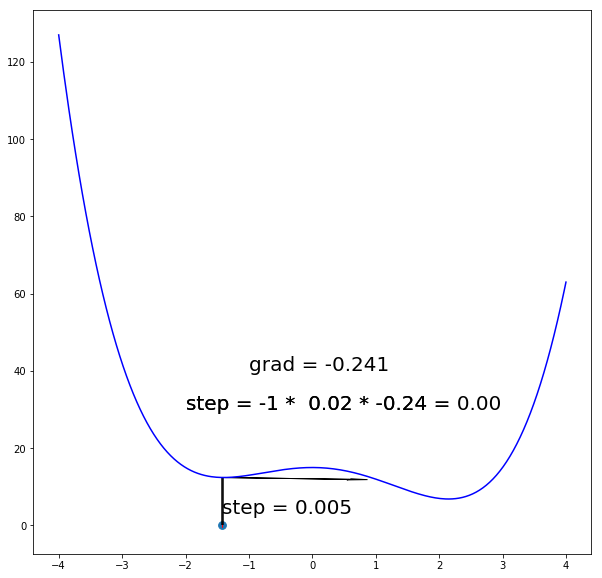

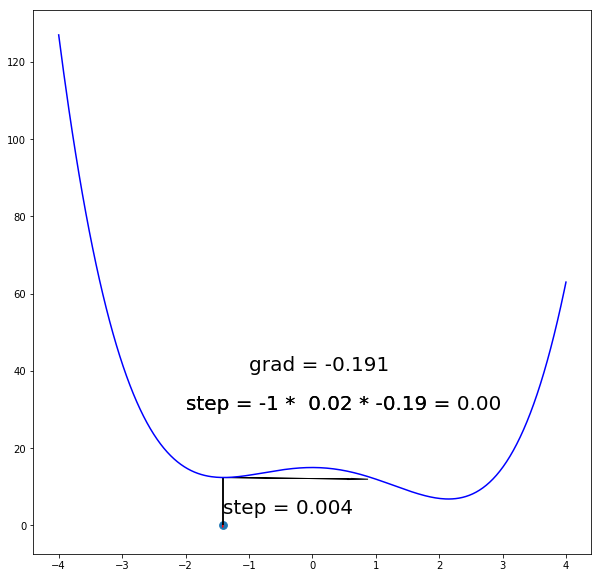

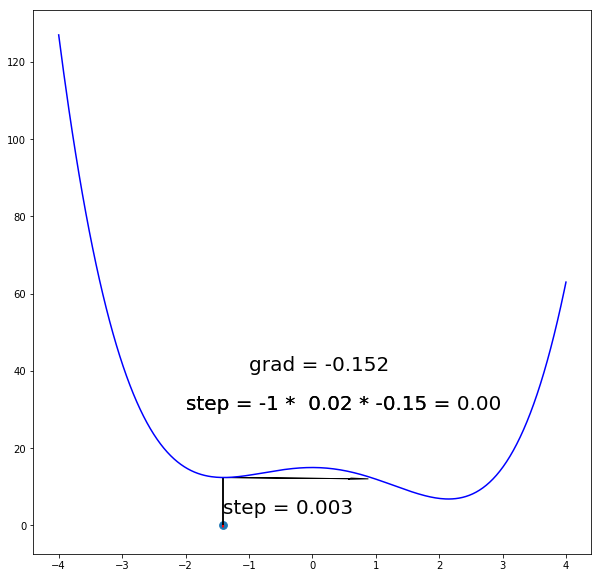

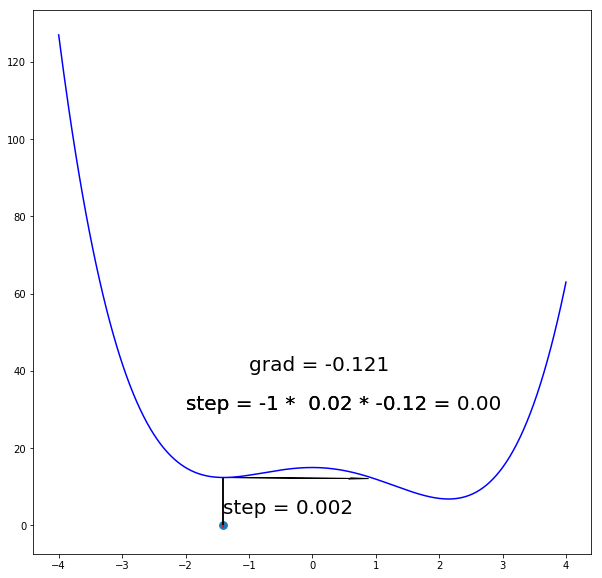

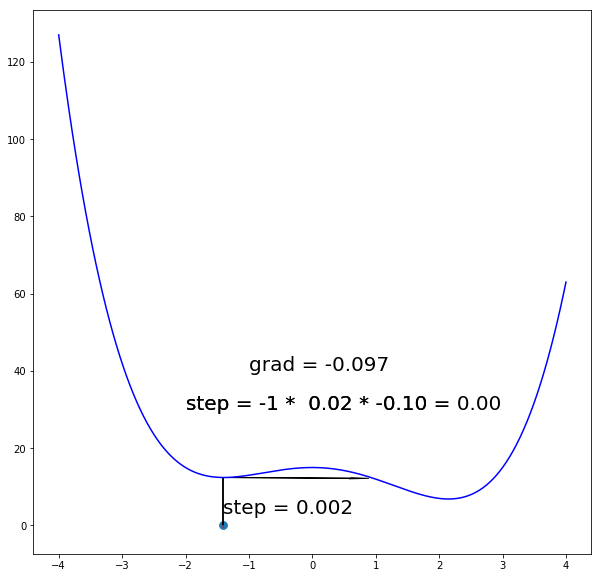

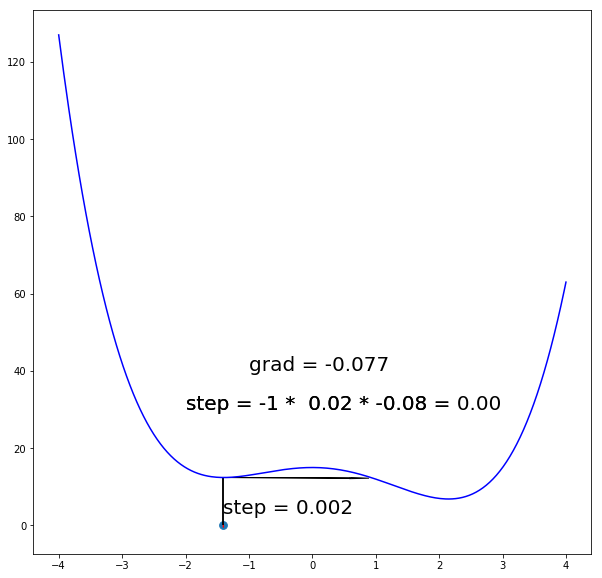

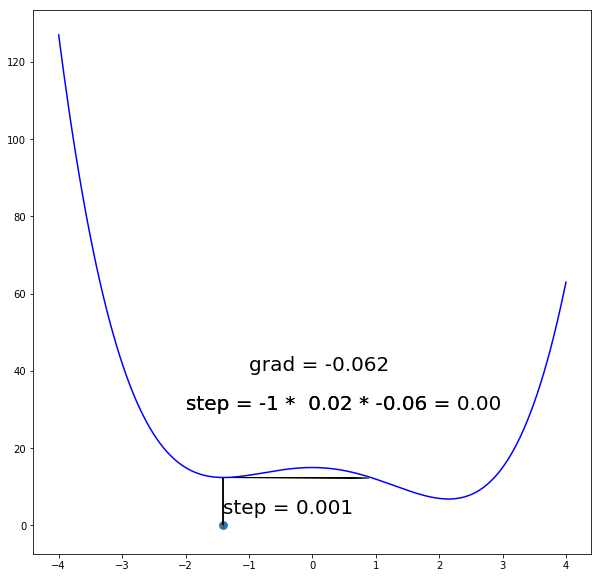

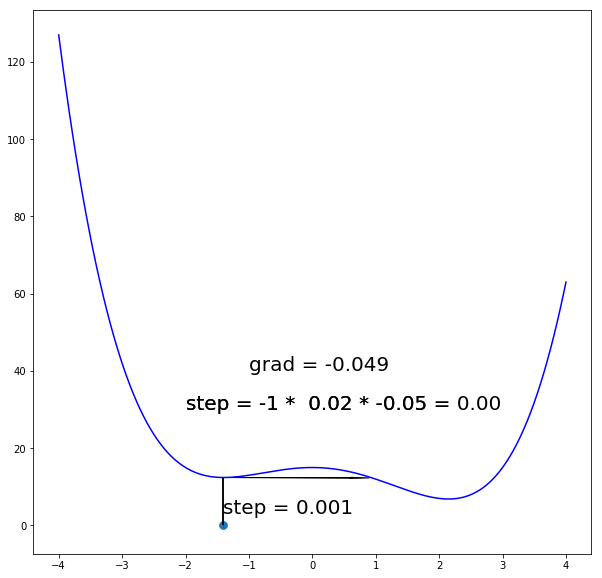

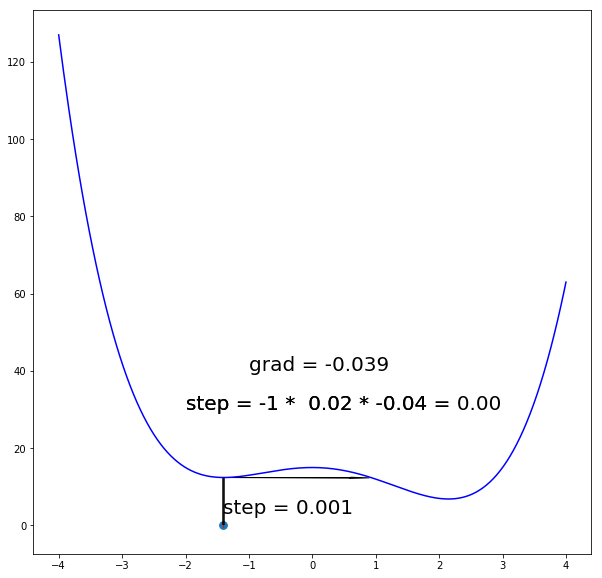

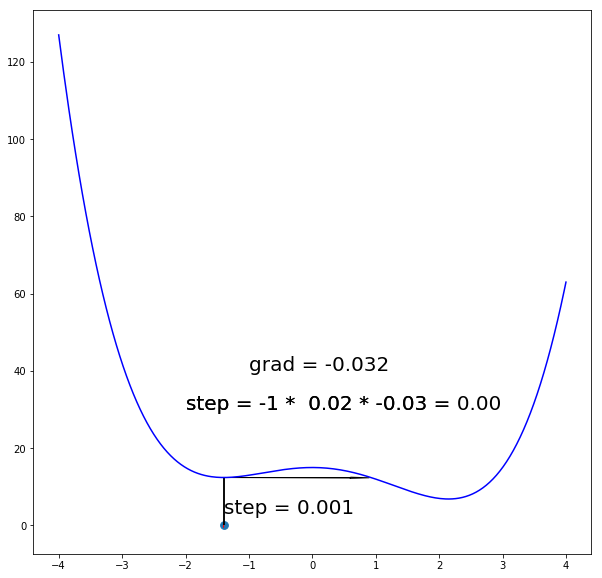

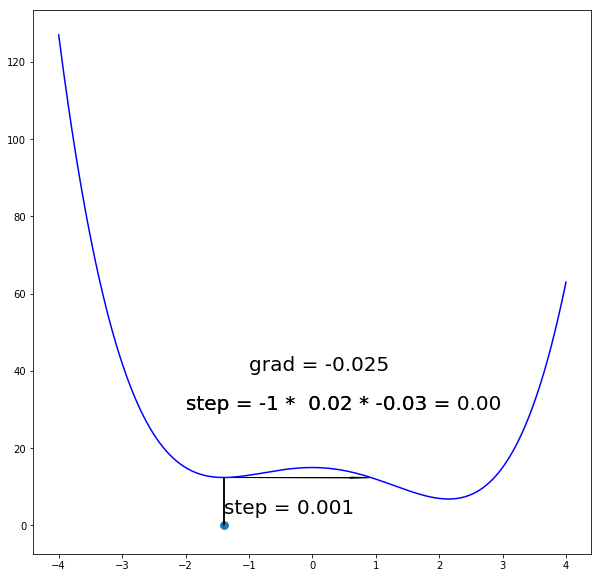

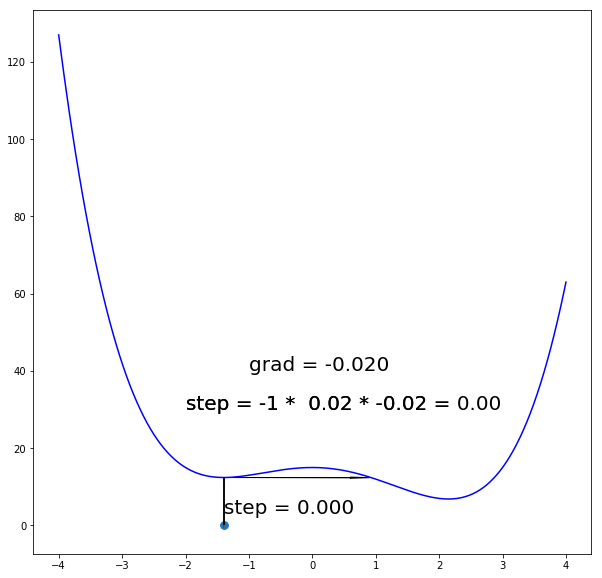

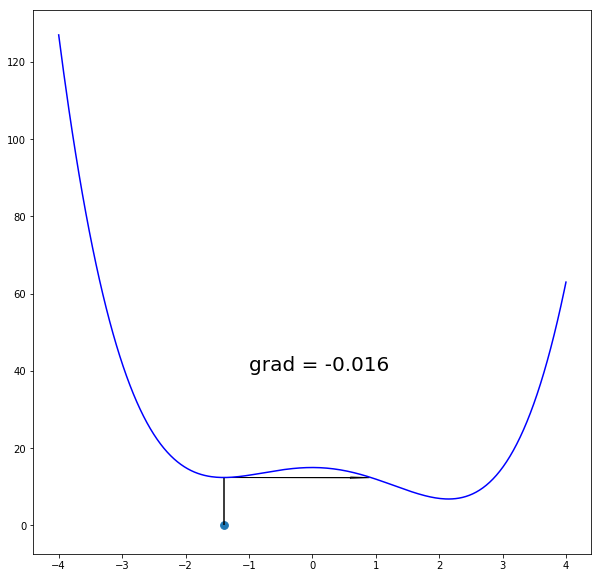

In [6]:
def f(x):
    return(0.5*(x**4 - x**3 - 6*x**2 + 30) )

def grad_f(x):
    return(0.5*(4*x**3 - 3*x**2 - 12*x))

visualise_gradient_decsent(f,grad_f,theta=-3,learning_rate=0.02,x=np.linspace(-4,4,300),sec=0.3)

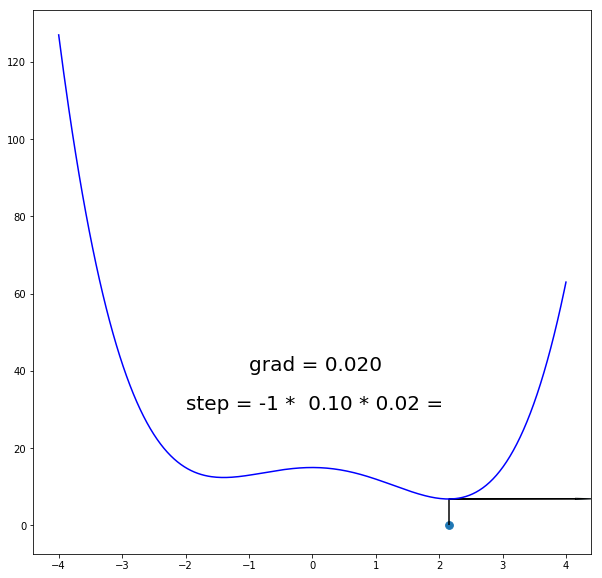

KeyboardInterrupt: 

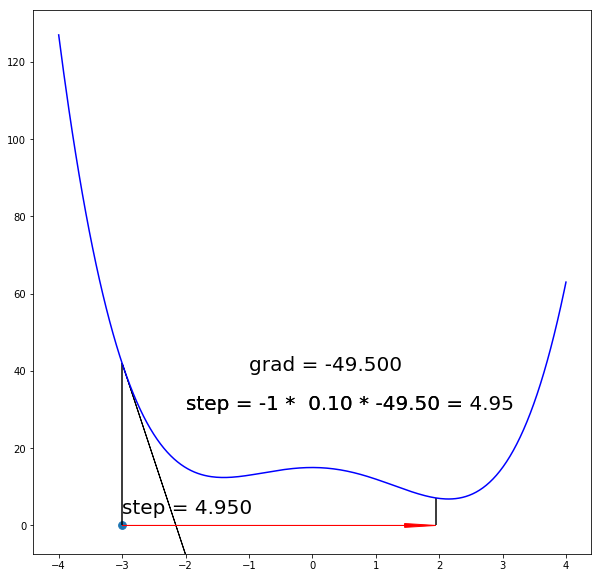

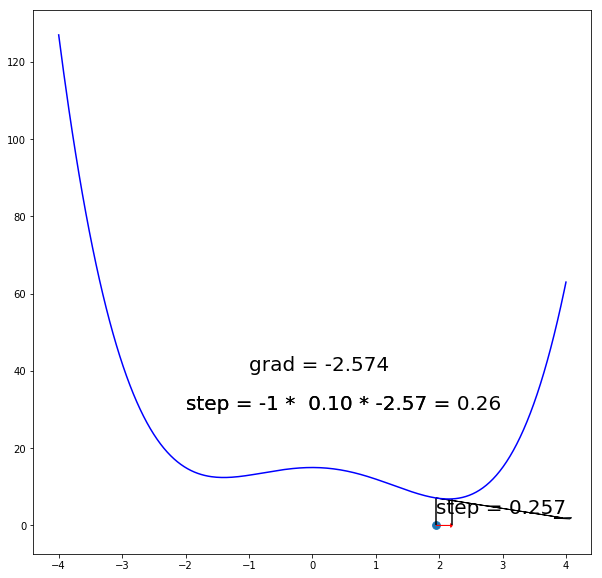

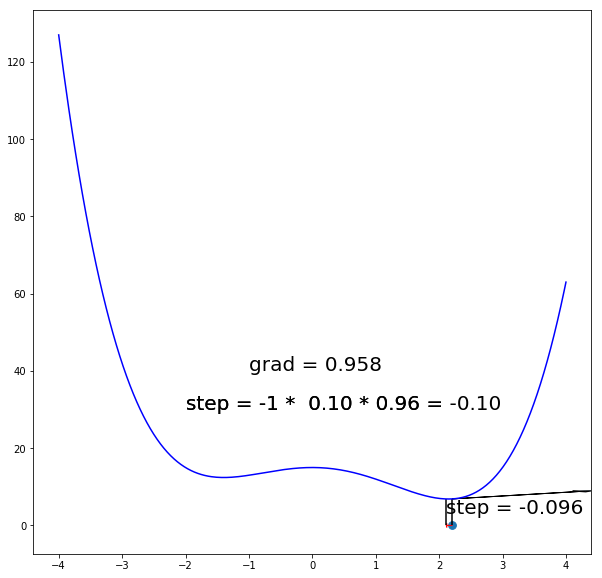

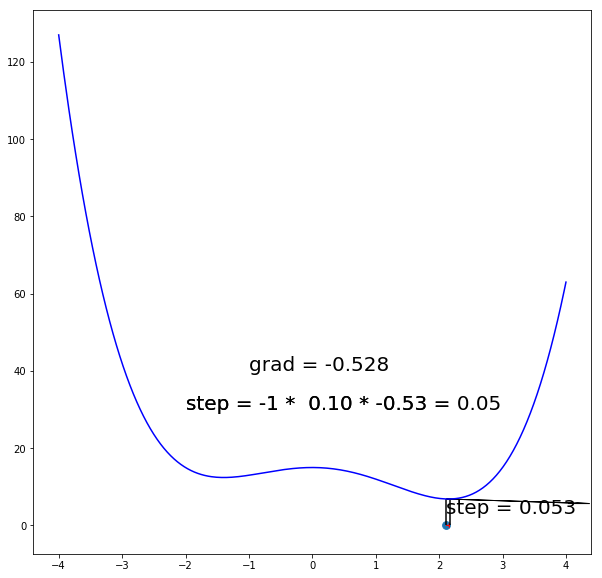

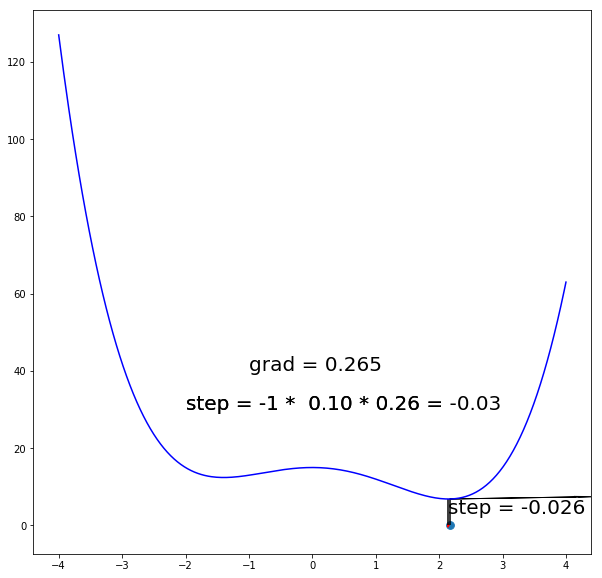

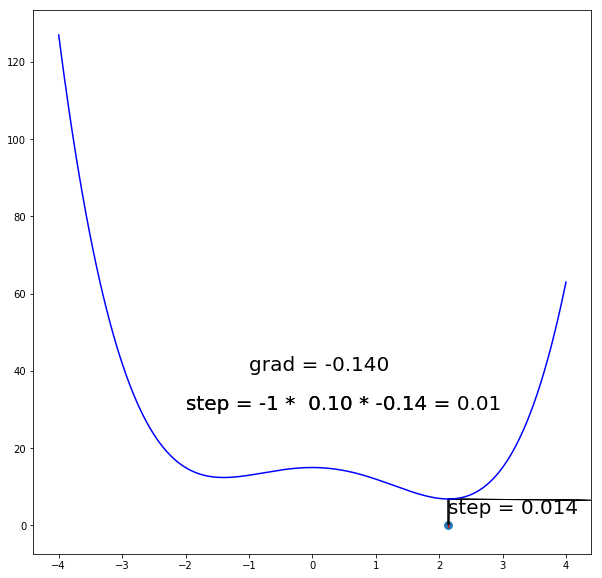

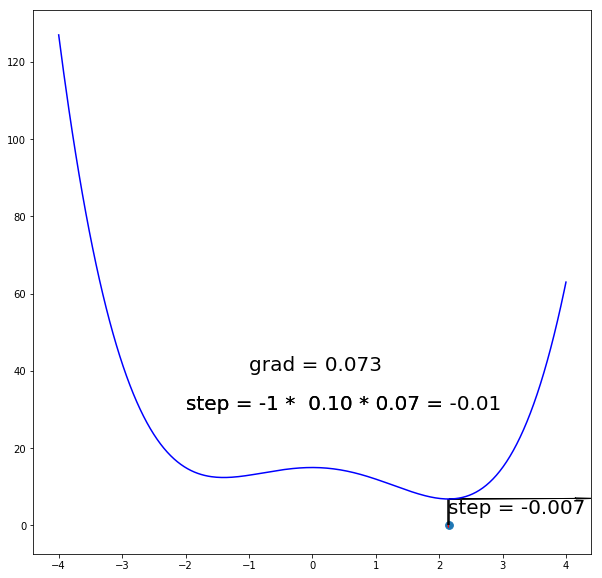

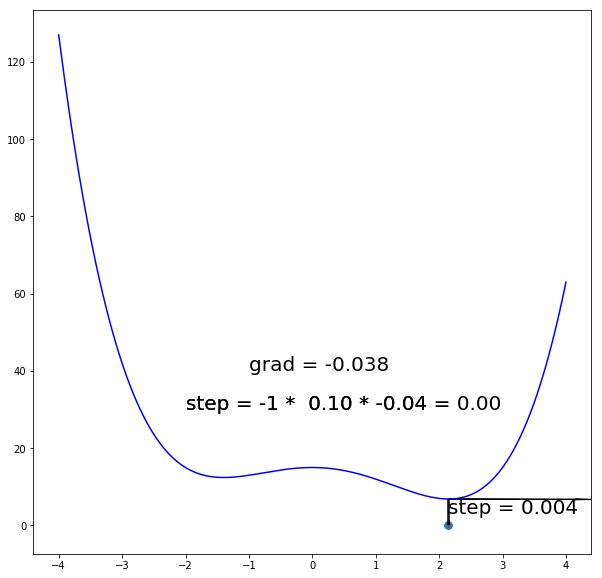

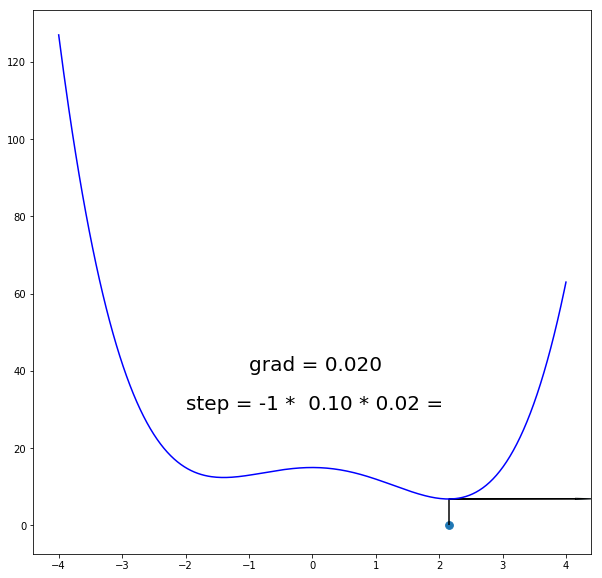

In [7]:
visualise_gradient_decsent(f,grad_f,theta=-3,learning_rate=0.1,x=np.linspace(-4,4,300),sec=0.5)

## Gradient decsent:
$$ Cost(\theta) = \frac{1}{n} \sum\limits_{i=1}^n f(x_i,y_i,\theta)$$
$$\theta = \theta - learning\_rate * \frac{dCost}{d\theta}$$

Uczenie (optymalizacja) odbywa się w "epokach" - jedna epoka to aktualizaja wartosci parametru na podstawie całego zbioru obserwacji.

## Stochastic gradient decsent - SGD:

$$ Cost(\theta) = \frac{1}{n} \sum\limits_{i=1}^n f(x_i,y_i,\theta)$$
$$ \ \ \text{Wybieramy} \ \ \{ i_1, ..., i_r \} - \text{losowy podzbiór obserwacji}$$
$$ \tilde{Cost}(\theta) = \frac{1}{r} \sum\limits_{i \in \{ i_1, ..., i_r \} } f(x_i,y_i,\theta),$$ 
$$\theta_{new} = \theta_{old} - learning\_rate * \frac{d\tilde{Cost}}{d\theta}$$
i powtarzamy to wielokrotnie tak, żeby każda obserwacja została wykorzystana jeden raz - w praktyce mieszamy losowo kolejność obserwacji i bierzemy kolejne podzbiory - np. dla "batcha" wielkości 10, uczymy kolejno na obserwacjach od 1 do 10, od 11 do 20, itd.. Przejście po całych danych to jedna *epoka*.

SGD jest fundamentalnym algorytmem uczenia sieci neuronowych wszelkiego rodzaju. W praktyce wykorzystuje się różne modyfikacje tego algorytmu (np. "adam").

# Neuron

<img src="Grafika/neuron.jpg" width="500">

Źródło: https://cdn-images-1.medium.com/max/1600/0*l4ohhbrwQ5MGvmGc.jpg

<br>
<br>

<img src="Grafika/perceptron.gif" width="400">
Źródło: http://blog.zabarauskas.com/img/perceptron.gif

$\sigma(\cdot)$ - funkcja aktywacji

## $\sigma(x) = \frac{1}{1+\exp{(-x)}}$

W praktyce popularne są trzy funkcje aktywacji:

- sigmoid
- tangens hiperboliczny
- RELU: $relu(x) = \max{(x,0)}$.

# Neuron jako klasyfikator:  Perceptron

In [8]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

class Perceptron(object):

    def __init__(self, eta=0.1, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.w_[0] = -50
        self.w_[1] = 10
        self.w_[2] = 1
        self.errors_ = []
        
        for i in range(self.epochs):
            
            plt.figure(figsize=(5,5))
        
            errors = 0
            for xi, target in zip(X, y):
                
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
                
            plt.scatter(X[:,0],X[:,1],c=y)
            plt.plot(np.linspace(4,7,100),-1 * (self.w_[0]+self.w_[1]*np.linspace(4,7,100))/self.w_[2])
            plt.title('Perceptron')
            plt.xlabel('sepal length [cm]')
            plt.ylabel('petal length [cm]')
            plt.xlim(4,7)
            plt.ylim(-1,6)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(1)

            self.errors_.append(errors)
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Wizualizacja procesu uczenia

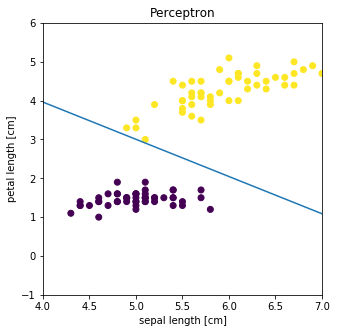

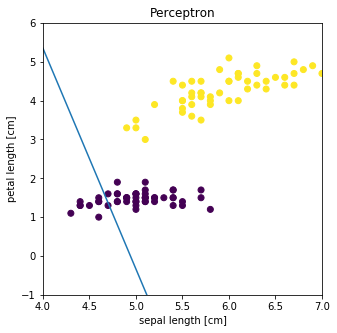

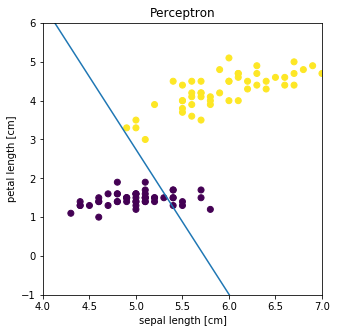

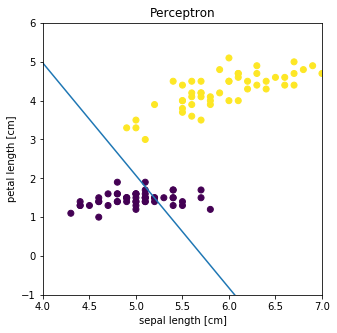

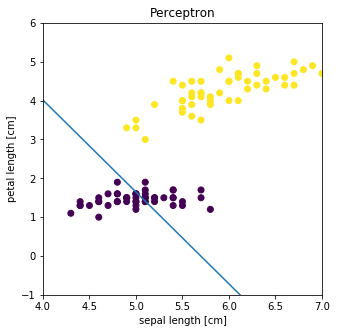

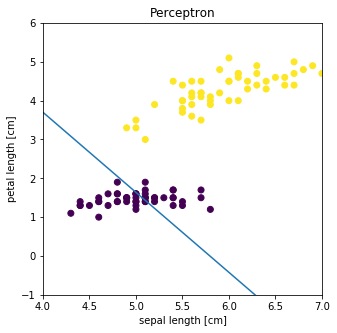

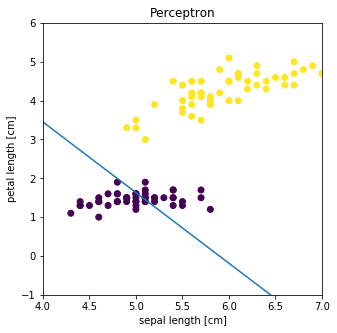

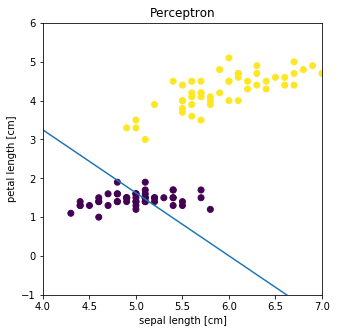

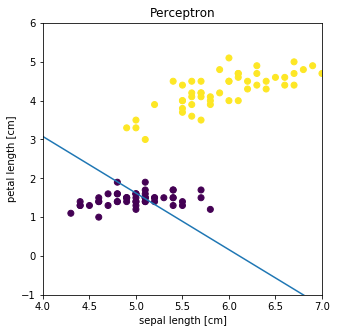

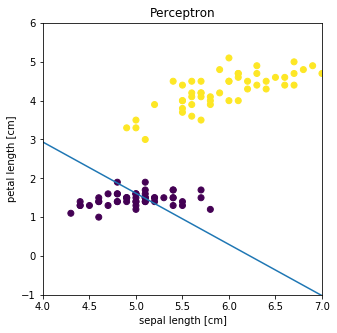

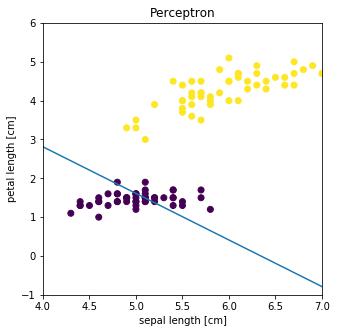

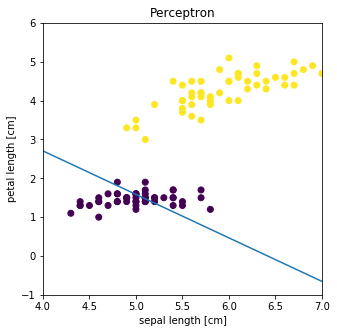

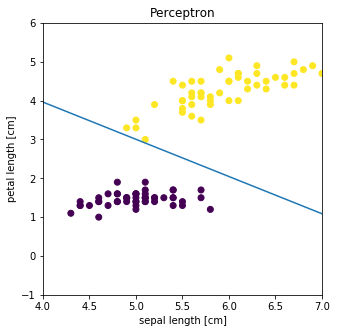

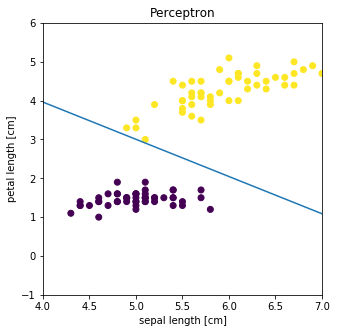

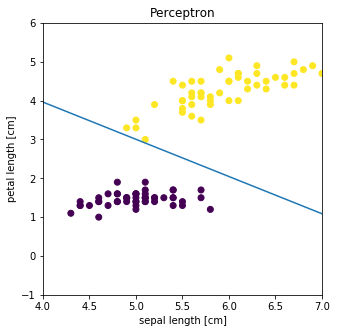

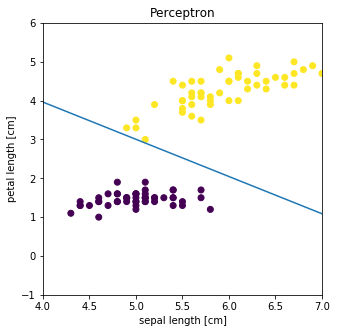

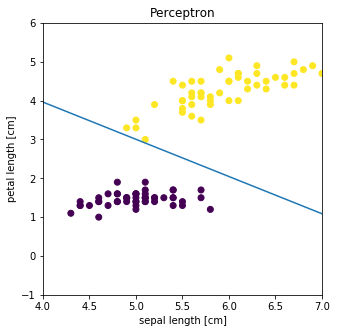

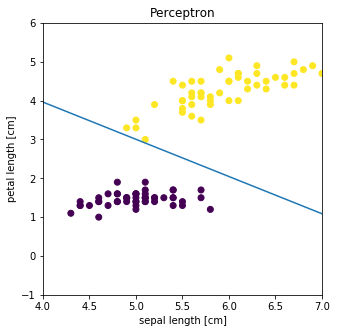

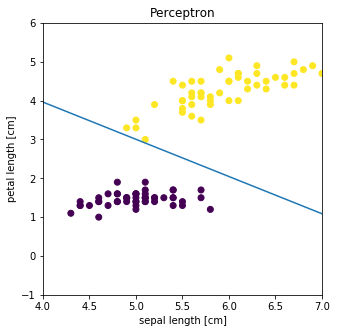

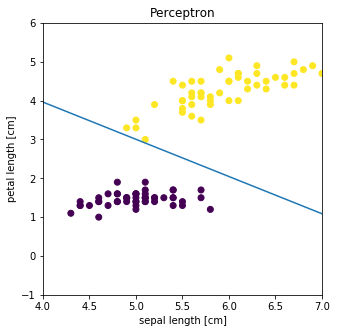

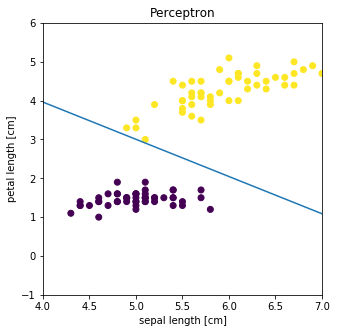

In [9]:
import numpy as np
import pandas as pd

df = pd.read_csv('Dane/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

ppn = Perceptron(epochs=20, eta=0.15)
ppn.train(X, y)

# Wielowarstwowa sieć neuronowa

(*Multilayer perceptron*, *feedforward neural network*)


<img src="Grafika/MLP.jpg" width="700">
Źródło: https://www.intechopen.com/source/html/39071/media/f2.jpg


**Uwaga:** "Input layer" pomimo tego, że ma w nazwie słowo "warstwa", to tak naprawdę to nie jest żadna warstwa sieci... To są po prostu dane wejściowe... Przyjęło się literaturze nazywanie tego w ten sposób, co jest trochę mylące :(


Sieci uczy sie metodą spadku gradientu (pewnymi wariantami tej metody). Uczenie wykorzystuje algorytm **propagacji wsteczej** (https://en.wikipedia.org/wiki/Backpropagation).

<br>

<br>

<br>

**Uwaga!** Sieci neuronowe absolutnie zawsze wymagają zestandaryzowanych danych! Niezależnie od tego czy wykorzystujemy regularyzację czy nie i niezależnie od typu sieci!

<br>

<br>

## Wizualizacja obszarów decyzyjnych w zależności od liczby neuronów

### (sieć jednowarstwowa)

<img src="Grafika/nn-from-scratch-hidden-layer-varying-655x1024.png" width="700">
Źródło: http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/nn-from-scratch-hidden-layer-varying-655x1024.png

<br>

### Fakt matematyczny: jednowarstwową siecią możemy otrzymać dowolny kształt. 

Co z tego wynika? To, że (teoretycznie) zawsze wystarczy sieć jednowarstwowa (odpowiednio duża). W praktyce rzeczywiście z reguły wystarcza jedna warstwa! Ale mimo wszystko można sprawdzić czy 2 lub 3 warstwy nie zadziałają przypadkiem lepiej. Przy czym jeżeli dla dwóch warstw jest gorzej, to nie ma sensu sprawdzać dla trzech.

# 1. Sieci wielowarstwowe - klasyfikacja na zwykłym zbiorze, testowanie warstw, dropoutów

In [28]:
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
dataset = np.loadtxt("Dane/pima-indians-diabetes.data", delimiter=",")
X = dataset[:,:8]
y = dataset[:,8]

print(X.shape)
print(np.mean(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

models = [make_pipeline(StandardScaler(), LogisticRegression()),
          DecisionTreeClassifier(),
          RandomForestClassifier()]

for model in models:

    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:,1]
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_true=y_test, y_score=probs))

(768, 8)
0.3489583333333333
Accuracy: 78.74% AUC:  0.8479873924748835
Accuracy: 67.72% AUC:  0.6561166196073281
Accuracy: 78.35% AUC:  0.8509094490774181


In [1]:
from sklearn.neural_network import MLPClassifier

In [2]:
?MLPClassifier()

Object `MLPClassifier()` not found.


Sieć MLP w sklearnie domyślnie zatrzymuje uczenie na podstawie tego co się dzieje w treningowym! Na to sobie można pozwolić, gdy pracujemy nad prostym problemem klasyfikacji na danych tabelarycznych. Przy bardziej złożonych problemach, podchodzimy do tego inaczej!

In [16]:
model = MLPClassifier(10)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_test, probs))

Accuracy: 62.99% AUC:  0.6587431873399436


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Teraz tak jak powinno być:

In [18]:
?MLPClassifier

In [17]:
model = make_pipeline(StandardScaler(), MLPClassifier(10))
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_test, probs))

Accuracy: 77.95% AUC:  0.8449668395823757


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [19]:
model = make_pipeline(StandardScaler(), MLPClassifier(3, max_iter=1000))
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_test, probs))

Accuracy: 78.35% AUC:  0.8490380195679296


In [24]:
model = make_pipeline(StandardScaler(), MLPClassifier((5,5), max_iter=1000))
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_test, probs))

Accuracy: 77.95% AUC:  0.8527808785869067


In [25]:
model.named_steps["mlpclassifier"].coefs_[0]

array([[ 0.12758551,  0.38871076, -0.85024641,  0.07329982,  0.17931663],
       [ 0.54246261,  0.92268385, -0.56550542,  0.3180773 , -0.5998978 ],
       [-0.41192101, -0.37219242, -0.32735094,  0.40998278, -0.02964054],
       [ 0.65770188, -0.12398916, -0.16593054,  0.1868492 ,  0.54099821],
       [ 0.16786426, -0.47875297,  0.10673524,  0.31289234, -0.4969925 ],
       [ 0.62314978,  0.45432379, -0.18918449,  0.05918855, -0.53066251],
       [-0.19159313, -0.10586944, -0.59974594,  0.67351101, -0.25136684],
       [ 0.22761443, -0.42331289, -1.04360707,  0.15472974, -0.64096283]])

In [26]:
model.named_steps["mlpclassifier"].loss_curve_

[0.7947870320718605,
 0.7836576609182586,
 0.7734529806156308,
 0.7633100146954542,
 0.7529109633882632,
 0.743876670838997,
 0.7352854277463253,
 0.7268410970352763,
 0.7186146966787773,
 0.7108911052984349,
 0.703462640516419,
 0.6963748979268876,
 0.6898950664914223,
 0.6832994358944892,
 0.6773506469339313,
 0.6713851588930901,
 0.6655665972650456,
 0.6601358300337462,
 0.6548418329995174,
 0.649687601948224,
 0.6448712527638851,
 0.6397246412304162,
 0.6351848377586474,
 0.6309245946302608,
 0.6266749386039827,
 0.62295991064957,
 0.6192511667711956,
 0.6151208050702097,
 0.6119987733444131,
 0.6087166876027299,
 0.6055668576804795,
 0.6023450950969885,
 0.5995851590762157,
 0.5965227197544858,
 0.5937840510224477,
 0.5911807604602353,
 0.5885664786309049,
 0.5860531022016211,
 0.5837001473784217,
 0.581293357730417,
 0.5791890298527655,
 0.5769786052379625,
 0.5749532997327463,
 0.5729296747874193,
 0.5708826821817958,
 0.5691097107727451,
 0.5672855903055286,
 0.5654421662968583

### Zadanie

Zachowanie sieci w zależności od liczby neuronów:

Ustaw `max_iter=10000, alpha=0` oraz tangens hiperboliczny jako funkcję aktywacji. Oceń skuteczność predykcji i dopasowanie dla sieci jednowarstwowej o nastepujących liczbach neuronów: [3,5,10,15,25,50,100,200,300,500].

In [32]:
for hidden_layer_size in [3,5,10,15,25,50,100,200,300,500]:

    model = make_pipeline(StandardScaler(),
                         MLPClassifier(hidden_layer_size, activation="tanh", 
                                       max_iter=10000, alpha=0))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_fittted = model.predict(X_train)

    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_fittted)

    print(hidden_layer_size, accuracy_test.round(2), accuracy_train.round(2))

3 0.78 0.78
5 0.79 0.78
10 0.77 0.78
15 0.75 0.89
25 0.74 0.96
50 0.73 1.0
100 0.74 1.0


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


200 0.72 0.93


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


300 0.74 0.87
500 0.79 0.77


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


### Zadanie

Przetestuj kilka wariantów sieci dwuwarstowe. (wykorzystaj `itertools.product`)

In [33]:
from itertools import product

for hidden_layer_sizes in product([5,10,15],[5,10]):

    model = make_pipeline(StandardScaler(),
                         MLPClassifier(hidden_layer_sizes, activation="tanh",alpha=0))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_fittted = model.predict(X_train)

    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_fittted)

    print(hidden_layer_size, accuracy_test.round(2), accuracy_train.round(2))

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


500 0.78 0.77


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


500 0.8 0.78


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


500 0.78 0.79


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


500 0.76 0.79


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


500 0.77 0.79
500 0.77 0.81


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Powyższe podejście do zatrzymywania uczenia jest akceptowalne tylko w prostych problemach. Ogólnie należy uczyć inaczej: early stopping!

<img src="Grafika/early_stopping.png" width="400">
Źródło: http://fouryears.eu/2017/12/06/the-mystery-of-early-stopping/comment-page-1/


In [36]:
for hidden_layer_size in [3,5,10,15,25,50,100,200,300,500]:

    model = make_pipeline(StandardScaler(),
                         MLPClassifier(hidden_layer_size, activation="tanh", 
                                       early_stopping=True,
                                      validation_fraction=0.15,
                                      n_iter_no_change=30))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_fittted = model.predict(X_train)

    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_fittted)

    print(hidden_layer_size, accuracy_test.round(2), accuracy_train.round(2))

3 0.62 0.67
5 0.7 0.67
10 0.76 0.75
15 0.75 0.72
25 0.76 0.77
50 0.75 0.75
100 0.79 0.77
200 0.79 0.76
300 0.76 0.75
500 0.79 0.78


Uwaga: trzeba uważać na to, żeby zbiór walidacyjny był wystarczająco duży, żeby o końcu uczenia nie zadecydował czynnik losowy!

Jednakże w praktyce sieci neuronowe stosuje się do raczej dużych zbiorów danych, bo dla małych lepeij działąja prostsze modele.

# Uwaga

W różnych materiałach możemy sie spotkać z tego typu kodem: 

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25) # uczenie sieci

model.evaluate(X_test, y_test) # ocena sieci

<br>

<br>

<br>

<br>

<br>

Takie coś nie ma prawa pojawić się w poprawnym modelowaniu, bo:

1. W czasie uczenia wykorzystujemy zbiór testowy (jako walidacyjny) - nie daje to rzetelnej oceny jakości modelu.
2. Liczba epok jest ustalona - tak się nie robi (poza wyjątkowymi sytuacjami).


<br>

<br>

<br>


### Ćwiczenie

Zoptymalizuj i oceń sieć neuronową na danych digits.

In [37]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=300)

In [44]:
from sklearn.model_selection import GridSearchCV


params = {
    'mlpclassifier__hidden_layer_sizes': [10, 15, 25, 50, 100,
                                         (5,5), (10,10), 
                                          (50, 50)],
    'mlpclassifier__activation': ['tanh', 'relu', 'logistic'],
    'mlpclassifier__solver': ['sgd', 'adam'],
    'mlpclassifier__max_iter': [1000]
}

pipe = make_pipeline(StandardScaler(),
                     MLPClassifier(early_stopping=True, 
                                   validation_fraction=0.15,
                                   n_iter_no_change=3))
grid = GridSearchCV(estimator=pipe,
                    param_grid=params,
                    n_jobs=-1,
                    cv=3,
                    verbose=1)

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy: %.2f%%" % (accuracy * 100.0))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   35.0s finished


Accuracy: 96.33%


In [45]:
grid.best_params_

{'mlpclassifier__activation': 'tanh',
 'mlpclassifier__hidden_layer_sizes': (50, 50),
 'mlpclassifier__max_iter': 1000,
 'mlpclassifier__solver': 'adam'}

In [ ]:
from sklearn.neural_network import MLPRegressor

## Keras

In [48]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [46]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kodolamacz/anaconda3/lib/python3.6/sit

In [47]:
?Dense

In [49]:
model = Sequential()
model.add(Dense(10,activation="sigmoid", 
                input_shape=(X_train.shape[1],)))
model.add(Dense(20, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss="binary_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
model.fit(X_train, y_train, batch_size=16, epochs=25)

Epoch 1/25
398/398 [==============================] - 1s 2ms/step - loss: 0.7123 - acc: 0.4497
Epoch 2/25
398/398 [==============================] - 0s 168us/step - loss: 0.6500 - acc: 0.6633
Epoch 3/25
398/398 [==============================] - 0s 237us/step - loss: 0.6058 - acc: 0.6382
Epoch 4/25
398/398 [==============================] - 0s 350us/step - loss: 0.5658 - acc: 0.6608
Ep

In [55]:
model.predict(X_test)[:3]

array([[0.04907508],
       [0.97198516],
       [0.9462532 ]], dtype=float32)

In [56]:
model.predict_classes(X_test)[:3]

array([[0],
       [1],
       [1]], dtype=int32)

In [57]:
accuracy_score(y_test, model.predict_classes(X_test))

0.9824561403508771

Z early stopping:

In [58]:
from keras.callbacks import EarlyStopping

In [62]:
?EarlyStopping

In [63]:
model = Sequential()
model.add(Dense(10, activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

early_stopping = EarlyStopping(patience=3, 
                               monitor="val_loss",
                              restore_best_weights=True)
model.fit(X_train, y_train, 
          batch_size=16, 
          validation_split=0.15, 
          callbacks=[early_stopping], 
          epochs=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 338 samples, validate on 60 samples
Epoch 1/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5937 - acc: 0.8698 - val_loss: 0.5499 - val_acc: 0.8833
Epoch 2/100
338/338 [==============================] - 0s 248us/step - loss: 0.5237 - acc: 0.8935 - val_loss: 0.4885 - val_acc: 0.9000

In [64]:
accuracy_score(y_test, model.predict_classes(X_test))

0.9707602339181286

### Ćwczenie

Zaimplementuj i ptrzetestuj sieć trzywarstwową o liczbach neuronów 32, 16, 8 i funkcją aktywaci tangens hiperboliczny.

In [65]:
model = Sequential()
model.add(Dense(32, activation="tanh", input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

early_stopping = EarlyStopping(patience=3, 
                               monitor="val_loss",
                               restore_best_weights=True)
model.fit(X_train, y_train, 
          batch_size=16, 
          validation_split=0.15, 
          callbacks=[early_stopping], 
          epochs=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________
Train on 338 samples, validate on 60 samples
Epoch 1/100
338/338 [==============================] - 1s 3ms/step - loss: 0.5222 - acc: 0.7278 - val_loss: 0.2841 - val_acc: 0.9500
Epoch 2/100
338/338 [==============================] -

## Reguaryzacja

Regularyzacja klasyczna - do funkcji kosztu dodajemy karę za wielkości współczynników - wag sieci (jak w regresji liniowej i logistycznej)

In [66]:
from keras.regularizers import l2

In [67]:
model = Sequential()
model.add(Dense(10, activation="sigmoid", 
                input_shape=(X_train.shape[1],), 
                kernel_regularizer=l2(0.01)))
model.add(Dense(10, activation="sigmoid", 
                kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation="sigmoid", 
                kernel_regularizer=l2(0.01)))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.fit(X_train,y_train, batch_size=16, validation_split=0.15, callbacks=[early_stopping], epochs=100)

model.evaluate(X_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________
Train on 338 samples, validate on 60 samples
Epoch 1/100
338/338 [==============================] - 1s 3ms/step - loss: 1.0010 - acc: 0.6272 - val_loss: 0.9491 - val_acc: 0.6333
Epoch 2/100
338/338 [==============================] - 0s 167us/step - loss: 0.9327 - acc: 0.6272 - val_loss: 0

[0.3886210792943051, 0.9766081888773288]

## Regularyzacja dropout


<img src="Grafika/dropout.jpeg" width="550">


In [68]:
from keras.layers import Dropout


model = Sequential()
model.add(Dense(10, activation="sigmoid", input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

early_stopping = EarlyStopping(patience=3, monitor="val_loss")
model.fit(X_train,y_train, batch_size=16, validation_split=0.15, callbacks=[early_stopping], epochs=100)

model.evaluate(X_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________
Train on 338 samples, validate on 60 samples
Epoch 1/100
338/338 [==============================] - 1s 4ms/step - loss: 1.1393 - acc: 0.3876 - v

[0.17848786258558083, 0.9766081888773288]

### Ćwiczenie

Zaimplementuj funkcję `construct_mlp(layer_sizes, activation_fun, dropout_rate, input_shape, compile=False)`, która zwraca kerasowy model, gdzie:
- `layer_sizes` - krotka rozmiarów kolejnych warstw gęstych,
- `activation_fun` - funkcja aktywacji dla warstw ukrytych,
- `dropout_rate` - stopień ewentualnego dropoutu, jeśli większy od 0, to po każdej warstwie dense w sieci umieszcamy dropout
- `input_shape` - kształt danych wejsciowych,
- `compile` - jeśli `True`, to zwracamy skompilowany model

Zakładamy, że rozwiązujemy problem klasyfikacji binarnej.

In [ ]:
def construct_mlp(layer_sizes, activation_fun, dropout_rate, 
                  input_shape, compile_model=False):
    
    model = Sequential()
    
    model.add(Dense(layer_sizes[0], 
                    activation=activation_fun, 
                    input_shape=input_shape))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
        
    for h_dim in layer_sizes[1:]:
        model.add(Dense(h_dim, activation=activation_fun))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
        
    model.add(Dense(1, activation="sigmoid"))
    
    if compile_model:
        model.compile(loss="binary_crossentropy", 
                      optimizer="adam", 
                      metrics=["accuray"])
    
    return model
    